In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Wczytanie danych# od razu to kurwa wykryło
Dane = pd.read_csv("CO2Emission.csv", sep=';', decimal=',').drop(columns=['Model'])

# Identyfikacja cech kategorycznych i numerycznych
CatFeatures = Dane.select_dtypes(include=['object']).columns
NumFeatures = Dane.select_dtypes(include=['float', 'int']).columns[:-1]

# Zdefiniowanie kolumny docelowej
Target_Var = 'CO2 Emissions(g/km)'

# Transformacja kolumny docelowej
Target_Var_transformer = KBinsDiscretizer(n_bins=5,  # Zdefiniuj transformator dla kolumny docelowej.
                                          encode="onehot-dense", 
                                          strategy="quantile")

y = Target_Var_transformer.fit_transform(X=Dane[[Target_Var]])

# Przygotowanie cech predykcyjnych
X = Dane[np.concatenate([CatFeatures, NumFeatures])]

Predictive_transformator = ColumnTransformer(transformers=[("OHE", OneHotEncoder(sparse_output=False), CatFeatures),
                                                           ("Scaler", StandardScaler(), NumFeatures)], remainder="passthrough")

X_coded = Predictive_transformator.fit_transform(X=X)

# Tworzenie i trenowanie regresora
MultiTarget_regressor = MultiOutputRegressor(estimator=LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X_coded, y, train_size=0.65)

MultiTarget_regressor.fit(X=X_train, y=y_train)
y_class = MultiTarget_regressor.predict(X=X_test)


max_values = y_class.max(axis = 1)


y_class_predicted = (y_class == max_values[:, np.newaxis]).astype(np.int8)

print(y_class_predicted)

[[0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 ...
 [0 1 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]]


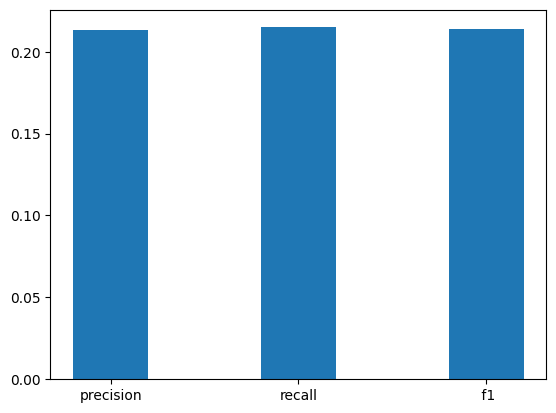

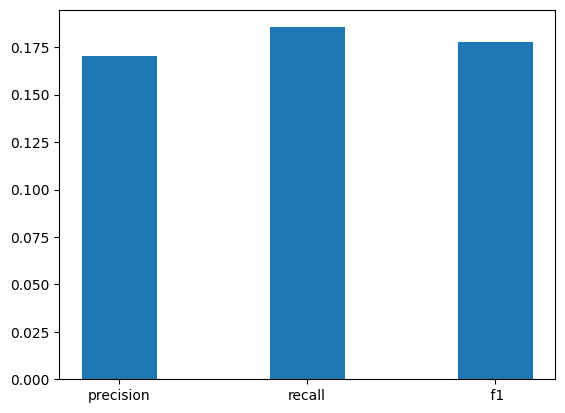

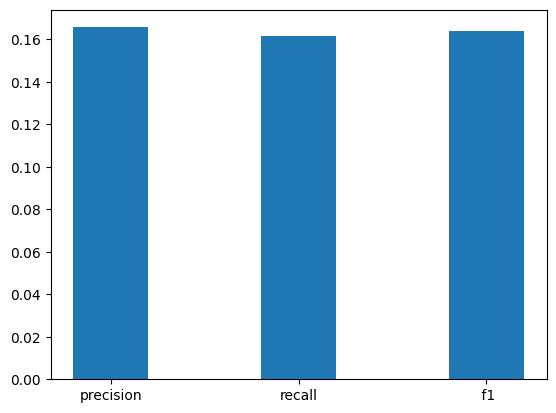

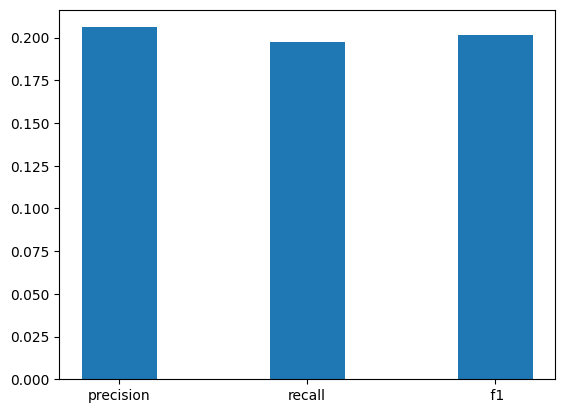

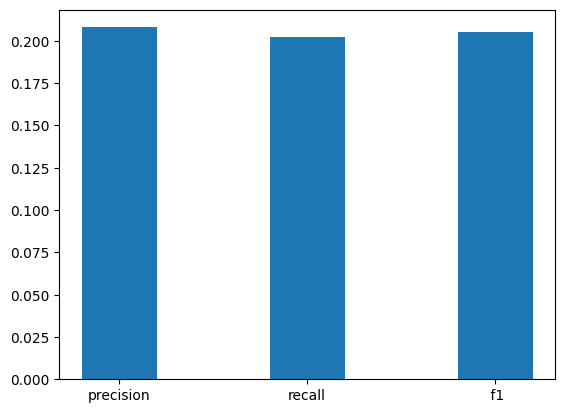

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

np.random.seed(42)


y_true = np.random.randint(0, 5, size = [5000])
y_pred = np.random.randint(0,5, size = [5000])




precision = precision_score(y_true, y_pred, average = None)
recall = recall_score(y_true, y_pred, average = None)
f1 = f1_score(y_true, y_pred, average = None)


porownanie = np.array([precision, recall, f1])



for i in range(porownanie.shape[1]):
    precision_i = porownanie[0,i]
    recall_i = porownanie[1,i]
    f1_i = porownanie[2,i]

    figure = plt.figure()
    axes = figure.add_subplot()

    axes.bar(x = [0, 2, 4], height =  [precision_i, recall_i, f1_i])

    axes.set_xticks([0,2,4])
    axes.set_xticklabels(labels = ["precision", 'recall',' f1'])




In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import StratifiedShuffleSplit as SSS


Classifier = LogisticRegression(multi_class='ovr')

y = pd.cut(Dane['CO2 Emissions(g/km)'], bins = [ -float('inf'), 150, 250, float("inf")], labels = [0,1,2])
X = Dane.iloc[:, :10].drop( columns =['Vehicle Class'])
X = Dane.select_dtypes(include = "number")



Odgradzator = SSS(n_splits = 1, train_size = 0.8, test_size = 0.2, random_state = 42)




for train_indx, test_indx in Odgradzator.split(X, y):
    Classifier.fit(X.iloc[train_indx, :], y.iloc[train_indx, ])

    print(Classifier.score(X = X.iloc[test_indx, :], y =y.iloc[test_indx, ]))

c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.991198375084631


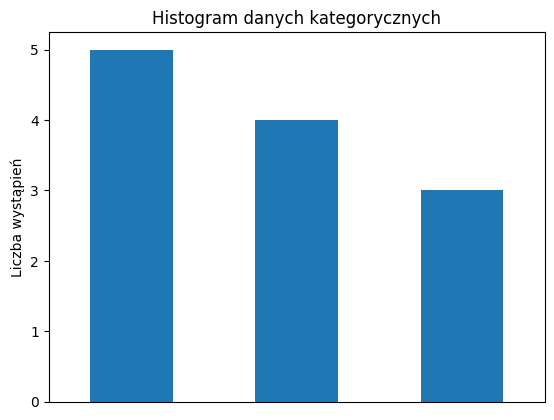

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Przykładowe dane
ser = pd.Series(['c', 'c', 'b', 'a', 'b', 'c', 'b', 'a', 'a', 'b', 'c', 'c'])

# Liczenie wystąpień kategorii
counts = ser.value_counts()

# Rysowanie histogramu bez nazw kategorii na osi X
counts.plot(kind='bar', xticks=[])
plt.ylabel('Liczba wystąpień')
plt.title('Histogram danych kategorycznych')
plt.show()



In [5]:
import seaborn as sns

a = Dane.iloc[:, -2:]

a.columns =['x','y']
a['y'] = pd.cut(a['y'], bins =[ -float('inf'), 150, 250, float('inf')], labels = [0,1,2])

sns.violinplot(data = a, x = 'x', hue = 'y')



KeyboardInterrupt: 

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd

train_size:float = 0.8
test_size:float = 1-train_size

n_sample:int = 50000

X:np.ndarray = np.random.uniform(0, 100, size = n_sample)

x_mean:float = np.mean(X)
x_var = np.sum((X - x_mean)**2)


#Wylicz czynnik losowego błędu.
ErRaTer:np.array = np.random.normal(loc = 0, scale = 1, size = n_sample)

#Znajdź parametry regresji liniowej.
b0 = 1
b1 = 3
#Wylicz wartości zmiennej Y.
Y = X*b1 + b0 + ErRaTer

RSS: callable = lambda x, X, Y: np.sum((x[0] + x[1]*X- Y)**2) #Zdefiniuj funkcję straty.




sol = minimize(fun = RSS, x0 = (1, 1), 
args = (X,Y))


b0_hat, b1_hat = sol.x

error_var:float = np.sqrt(RSS([b0_hat, b1_hat], X, Y)/(n_sample-2))



SE_b0 = error_var**2 * ( 1/n_sample +  x_mean**2/x_var )
SE_b1 = error_var**2/ x_var
print(f'Szacowana wartość parametru b0 to: {b0_hat}. Wartość błędu standardowego dla tego parametru to: {SE_b0}')

print(f'Szacowana wartość parametru b1 to: {b1_hat}. Wartość błędu standardowego dla tego parametru do {SE_b1}')


Szacowana wartość parametru b0 to: 0.9931080240609681. Wartość błędu standardowego dla tego parametru to: 8.083384782791195e-05
Szacowana wartość parametru b1 to: 3.000148744070785. Wartość błędu standardowego dla tego parametru do 2.4244381212717645e-08


0
1
2
3
4


<Axes: ylabel='Count'>

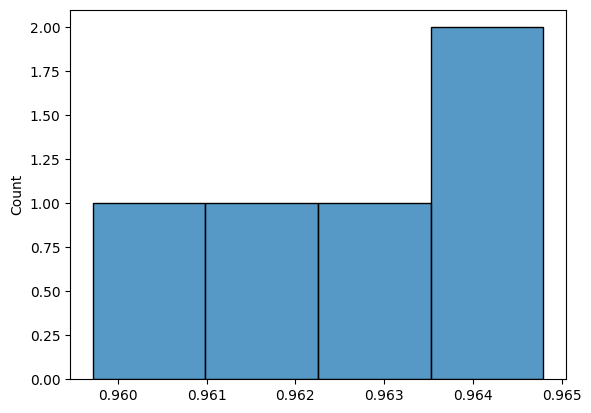

In [67]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import StratifiedShuffleSplit as SSS 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from seaborn import histplot
from sklearn.pipeline import Pipeline


dtypes = { "Make": "category", #Określ typ danych każdej cechy w ramce danych, która zostanie zaraz odczytana.
            "Model":"category",
            "Vehicle Class":"category",
            "Engine Size(L)":np.float64,
            "Cylinders":"category",
            "Transmission":"category",
            "Fuel Type":"category",
            "Fuel Consumption City (L/100 km)":np.float64,
            "Fuel Consumption Hwy (L/100 km)":np.float64,
            "Fuel Consumption Comb (L/100 km)":np.float64,
            "Fuel Consumption Comb (mpg)":np.float64,
            "CO2 Emissions(g/km)":np.float64}


Data = pd.read_csv("CO2Emission.csv", sep = ';', dtype = dtypes, decimal = ",")


X = Data.iloc[:, :-1].drop(columns = ["Model"])
Predyctors = X.columns

Y = Data.iloc[:, -1]

Y = pd.cut(x = Y, bins = [-float('inf'), 150, 250, float('inf')], labels = [0,1,2]).to_numpy()


ColTrans = ColumnTransformer(transformers = [("LabEnc", OneHotEncoder(sparse_output = False), make_column_selector(dtype_include = "category"))],
                             remainder = "passthrough")

SFS1 = SFS(estimator = KNeighborsClassifier(n_neighbors = 5), n_features_to_select =   "auto", tol = 5)



#Wytrenuj transformator kolumn.
ColTrans.fit(X = X)

X:np.ndarray =  ColTrans.transform(X = X) #Przekształc macierz predyktorów.

StratifiedSS = SSS(n_splits = 5, train_size = 0.6)

Wyniki:list[float] = []

for i, indices in enumerate(StratifiedSS.split(X =  X, y = Y)):
    #Wydobądź indeksy treningowe i indeksy testowe.
    train_indices, test_indices = indices

    X_train, Y_train = X[train_indices, :], Y[train_indices,]
    X_test, Y_test = X[test_indices, :], Y[test_indices, ]


    SFS1.fit(X = X_train, y = Y_train)
    
    X_test_opt = SFS1.transform(X = X_test)
    X_train_opt = SFS1.transform(X = X_train)

    Model = KNeighborsClassifier(n_neighbors  = 5)
    Model.fit(X = X_train_opt, y = Y_train)

    Wynik:float = Model.score(X = X_test_opt, y = Y_test)

    Wyniki.append(Wynik)
    print(i)

histplot(x = Wyniki)

In [68]:
np.random.seed(42)
ramka = pd.DataFrame(data = np.random.randint(low =  -10, high = 10, size = [5000, 3]))
ramka2 = 2*ramka





In [69]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Zmienne = ['A','B','C','D','E']
PCA_predictors = ['B','E']

noPCA_predictors =[var for var in Zmienne if var not in PCA_predictors]


np.random.seed(42)

Zbior = pd.DataFrame(np.random.uniform(low = -100, high = 100, size = [5000, 5]), columns = Zmienne)


PCA_transformer = Pipeline(steps = [('Scaler', StandardScaler()), ('PCA', PCA(n_components = 1))])
Num_transformer = Pipeline(steps = [('Scaler', StandardScaler() )])

Transformator = ColumnTransformer(transformers = [ ("Num", Num_transformer, noPCA_predictors ), ("PCA", PCA_transformer, PCA_predictors)], remainder = "passthrough")


Transformator.fit(X = Zbior[Zmienne])
X_coded =Transformator.transform(X = Zbior[Zmienne])
print(X_coded)



[[-0.44315016  0.79401515  0.31315909 -1.95663142]
 [-1.19867791  1.25553984  0.32174272  1.58404657]
 [-1.66680005  1.13951219 -1.0367226  -1.93989827]
 ...
 [ 1.11930976 -0.36986784  1.1830756   0.47174043]
 [ 0.11802294  1.42619595 -1.1165985  -0.42503448]
 [-0.60581612  1.45193033  0.44813057  0.55142686]]


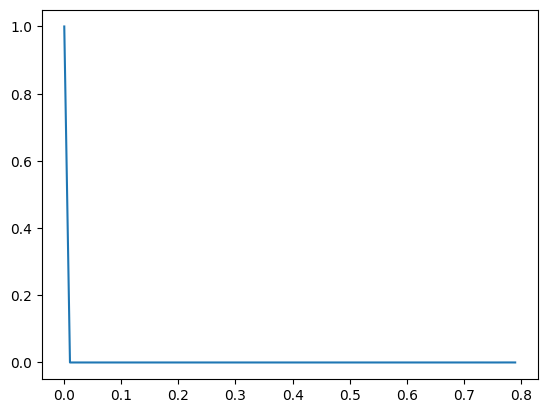

In [70]:
import numpy as np
from math import comb
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

def Prawdopodobieństwo(Rozklad:pd.DataFrame, train_size:float) -> float:
    n:int = Rozklad["count"].sum()

    n_train:int = int(train_size* n)
    iloczyn:int = 1


    for i in range(len(Rozklad.index)):
        ni:int = Rozklad.iloc[i, 1]

        iloczyn *= comb(ni, int(ni*train_size))

    return iloczyn/comb(n, n_train)




Rozklad = pd.Series(np.random.randint(0, 5, size = 5000)).value_counts(normalize = False, sort = False).reset_index()

X:list[float] = []
Y:list[float] = []

for train_size in np.arange(0, 0.8, 0.01):
    Pra = Prawdopodobieństwo(Rozklad, train_size)

    X.append(train_size)
    Y.append(Pra)


plt.plot(X, Y)

In [71]:


from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit as SSS, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# class DynamicColumnTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, cat_features, num_features):
#         self.cat_features = cat_features
#         self.num_features = num_features
#         self.column_transformer = None

#     def fit(self, X, y=None):
#         cat_features = [col for col in X.columns if col in self.cat_features]
#         num_features = [col for col in X.columns if col in self.num_features]
        
#         self.column_transformer = ColumnTransformer(
#             transformers=[
#                 ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
#                 ('num', 'passthrough', num_features)
#             ]
#         )
#         self.column_transformer.fit(X, y)
#         return self

#     def transform(self, X):
#         return self.column_transformer.transform(X)

#     def get_feature_names_out(self, input_features=None):
#         return self.column_transformer.get_feature_names_out(input_features)


np.random.seed(42)
dtypes = { "Make": "category", #Określ typ danych każdej cechy w ramce danych.
            "Model":"category",
            "Vehicle Class":"category",
            "Engine Size(L)":np.float64,
            "Cylinders":"category",
            "Transmission":"category",
            "Fuel Type":"category",
            "Fuel Consumption City (L/100 km)":np.float64,
            "Fuel Consumption Hwy (L/100 km)":np.float64,
            "Fuel Consumption Comb (L/100 km)":np.float64,
            "Fuel Consumption Comb (mpg)":np.float64,
            "CO2 Emissions(g/km)":np.float64}


Parametry = {"criterion":['gini','entropy'],
                                       "splitter":['best','random'],
                                       "min_samples_split":[2,3,5],
                                        "min_samples_leaf":[2,3,4]}

Parametry = { f"Classifier__{param}":Parametry[param] for param in Parametry.keys()}



Predictors = ['Make', "Vehicle Class",'Engine Size(L)','Cylinders','Transmission','Fuel Type',"Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)",
                                                                                       "Fuel Consumption Comb (L/100 km)","Fuel Consumption Comb (mpg)"]

#Podziel zbiór predyktorów na zmienne numeryczne oraz zmienne kategoryczne odpowiednio.
Num_predictors:list[str] = [feature for feature in Predictors if dtypes[feature] is np.float64]
Cat_predictors:list[str] = [feature for feature in Predictors if dtypes[feature] == "category"]



X = pd.read_csv("CO2Emission.csv", sep = ";",  decimal= ",", dtype = dtypes)[Predictors]
Y  = pd.cut(pd.read_csv("CO2Emission.csv", sep = ';', decimal = ',', dtype = dtypes)["CO2 Emissions(g/km)"], 
            bins = [-float('inf'), 150, 250, float("inf")], 
            labels = [0, 1,2])




Model = DecisionTreeClassifier()

SFS_inst = SFS(estimator = Model, n_features_to_select = 2)


Rura = Pipeline([ ("OHE_encoder", OneHotEncoder(sparse_output = False)), ( "FeatureSelector", SFS_inst), ("Classifier", Model)])


GridSearch = GridSearchCV(estimator = Rura, param_grid = Parametry, cv = 2)


SSS_inst = SSS(n_splits = 1, train_size = 0.8, test_size = 0.2)


for indx in SSS_inst.split(X = X, y = y):
    train_indx, test_indx = indx

    X_train, X_test = X.iloc[train_indx], X.iloc[test_indx]
    Y_train, Y_test = Y.iloc[train_indx], Y.iloc[test_indx]


    GridSearch.fit(X = X_train, y = Y_train)

    print(GridSearch.score(X = X_test, y = Y_test))
    
    

c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 1000, in score
    Xt = transform.transform(Xt)
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\pawel\AppData\Local\Programs\Python

In [ ]:
import pandas as pd
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

class RareClassAggregator(TransformerMixin, BaseEstimator):
    def __init__(self, cat_features:list[str], q:float = 0.1) -> None:
        assert isinstance(q, float) and 0< q <1, "Argument 'q' musi być liczbą zmiennoprzecinkową z przedziału (0;1)"

        self.cat_features:list[str] = cat_features
        self.q: float = q

    def validate_X(self, X:pd.DataFrame) -> None:
        "Sprawdza czy x spełnia warunki"
        assert isinstance(X, pd.DataFrame), "Argument 'X' musi być instancją klasy pd.DataFrame!"

        assert isinstance(self.cat_features, list)



    def fit(self, X:pd.DataFrame, y: None = None) -> "RareClassAggregator":
        """Wylicz próg częstowliwościowy dla zmiennej kategorycznej 'cat_feature'.
        Opis argumentów:
        ---------
        X:pd.DataFrame - Ramka danych typu pandas, która zawiera ceche 'cat_feature', której rzadkie cechy chcemy połączyć w jedną klase.
        """
        #'y' musi być stale równy None. Nie jest on potrzebny dla tego estimatora.
        if y is not None:
            raise ValueError("Argument 'y' musi być zawsze ustawiony na wartość None!")
        self.validate_X(X = X) #Sprawx, czy argument X spełnia podstawowe założenia.


        self.X_train: pd.DataFrame = X #Zdefiniuj zbiór treningowy.
      

        #self.cat_features:list[str] = self.X_train.head(1).select_dtypes(include = [pd.CategoricalDtype, "object"]).columns #Lista nazw zmiennych kategorycznych

        self.freq_thresholds:list[float] = [self.X_train[cat_feature].
                                            value_counts(normalize = True, sort = False).
                                            quantile(q = self.q) for cat_feature in  self.cat_features] #Wyestymuj znormalizowaną tabelę krzyżową.
 
        
        return self


    def transform(self, X:pd.DataFrame) -> pd.DataFrame:
        """Transformuje ramkę danych X, agregując rzadkie klasy zmiennej kategorycznej 'cat_feature' """
        self.validate_X(X = X)

        cat_features:list[str] = X.head(1).select_dtypes(include = "object").columns

        assert set(cat_features).issubset(self.cat_features), "Zbyt wiele zmiennych kategorycznych przekazałeś!"

        for i, cat_feature in enumerate(cat_features):
            class_freqtable:pd.Series =  X[cat_feature].value_counts(normalize = True, sort = False) #Wyestymuj znormalizowaną tabelę krzyżową.

            aggregated_col:pd.Series = ( X[cat_feature].     #Stwórz agregowaną kolumnę cechy kategorycznej.
                                        apply(func = lambda v:   v if class_freqtable[v] >= self.freq_thresholds[i] else "Other" ) )
            

            X.loc[:, cat_feature]  = aggregated_col

        return X
        
    def get_feature_names_out(self,):
        pass




        
dane = pd.read_csv("CO2Emission.csv", sep = ';',  decimal = ',')

cat_features = [var for var in dane.columns if dane.dtypes[var] == "object"]

RareClassAggregator_inst = RareClassAggregator(cat_features = cat_features, q = 0.8).set_output(transform = "pandas")


StandardScaler().set_output(transform = "pandas")


StandardScaler()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



np.random.seed(42)
Var1:np.ndarray = np.random.randint(0, 10, size = 5000)
Var2:np.ndarray = np.random.randint(0, 5, size = 5000)
Var3:np.ndarray = np.random.uniform(0, 5, size = 5000)

Var = np.column_stack(tup = (Var1, Var2, Var3))

Dataframe:pd.DataFrame = pd.DataFrame(data = Var, columns = ["A","B", "C`"], dtype = "category")


Encoder:ColumnTransformer = ColumnTransformer(transformers = [ ("OHE", OneHotEncoder(sparse_output = False), ["A", "B"])],
                            remainder = "passthrough", verbose_feature_names_out = False)

Encoder.set_output(transform = "pandas")
Encoder.fit(X = Dataframe)
    



,A_0.0,A_1.0,A_2.0,A_3.0,A_4.0,A_5.0,A_6.0,A_7.0,A_8.0,A_9.0,B_0.0,B_1.0,B_2.0,B_3.0,B_4.0,C`
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.441654
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.020653
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.679078
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.170026
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.421940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.249001
4996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.903136
4997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.237539
4998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.681828


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.base import TransformerMixin, BaseEstimator
from itertools import permutations


class CustomEncoder(TransformerMixin, BaseEstimator):

    def __init__(self,  Encoder: dict[str, int]) -> None:
        self.Encoder:dict[str, int] = Encoder #Zapisz własnoręczny koder zmiennej kategorycznej.
        self.available_class:list[str] = list(Encoder.keys())



    
    def fit(self,X:np.ndarray, y:np.ndarray | None = None) -> None:

        assert X.ndim == 1, "Tablica X musi być jednowymiarowa!"


        self.unique_classes:np.ndarray = np.unique(X) #Znajdź unikatowe klasy.
        self.n_unique_classes:int = self.unique_classes.shape[0] #Znajdź liczbę unikatowych klas.


        return self





    def transform(self, X:np.ndarray, y:np.ndarray | None = None) -> np.ndarray:
        """Koduje kategorie zmiennej X (ktore są ciągami znaków, które zostały określone w atrybucie self.Encoder)."""
        unique_classes:np.ndarray = np.unique(X)
        n_unique_classes:np.ndarray = unique_classes.shape[0]


        assert n_unique_classes == self.n_unique_classes, "Liczba klas unikatowych jest różna od nauczonej liczby!"

        X_coded:np.ndarray = np.zeros(shape = X.shape, 
                                      dtype = np.int16)
        

        for i in range(X.shape[0]):
            X_coded[i] = self.Encoder[X[i]]     

        return X_coded
           
            













np.random.seed(21)
Kategorie = ['A','B','C','D','E','F']

X:np.ndarray = np.random.uniform(0, 100, size = [5000, 5]) #Tabela z predyktorami.
Y:np.ndarray = np.random.choice(a = Kategorie, size = [5000])

Wspołczynniki = []


for perm in permutations(iterable = range(0, len(Kategorie))):
    Koder = {Kategorie[i]:perm[i] for i in range(len(Kategorie))}

    Y_coded = CustomEncoder(Encoder = Koder).fit_transform(X = Y)

    Regresja = LinearRegression().fit(X = X, y = Y_coded)
    Wspołczynniki.append(Regresja.coef_[0])

maks:float | None = None

for i in range(len(Wspołczynniki)):
    for j in range(i+1, len(Wspołczynniki)):
        dev:float =  abs(Wspołczynniki[i]-Wspołczynniki[j])
        if maks is None or (maks is float and  dev > maks):
            maks = dev


print(maks)




0.0001412439845069723


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer, accuracy_score



np.random.seed(1)
X1 = np.array(['A','A','B','B','B','A','A','C','C',]).reshape(-1,1)



Data = pd.DataFrame(data = X1, columns = ['ale'])
Data['ale'].unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = np.random.randint(-5, 5, size = [500, 3])
y = np.random.randint(-5,5, size = 500)

class WrappedStandard(SFS):



    def __init__(self,  cat_vars:list[int], **kwargs):
        super().__init__(**kwargs)
        self.cat_vars:list[int] = cat_vars



    def _get_best_new_feature_score(self, estimator, X, y, cv, current_mask):
        pass
        



import numpy as np

current_mask = np.array([0,1,0], dtype = bool)
print(current_mask)
np.flatnonzero(~current_mask)
# Wynik: [0, 2, 4] 



[False  True False]


array([0, 2], dtype=int64)

### W TYM MIEJSCU MOGĘ ZROBIĆ KODOWANIE OneHotEncoding

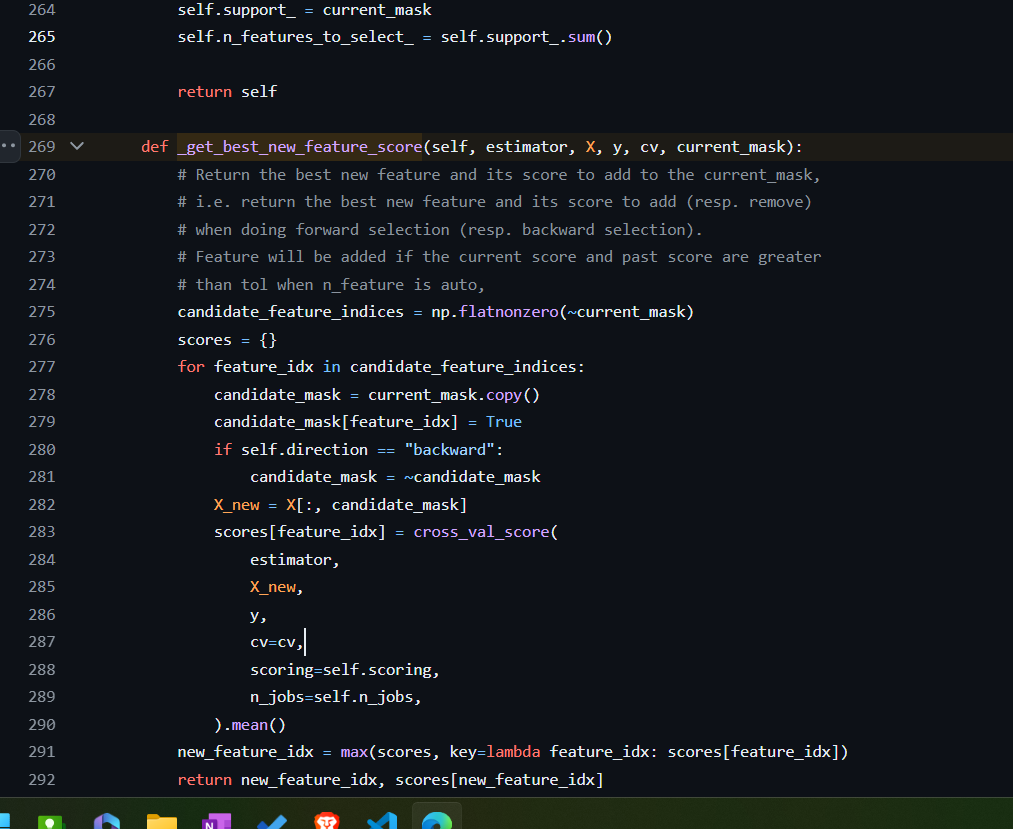

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, make_scorer
import numpy as np
import pandas as pd




class WrappedSequentialFeatureSelection(SFS):
    


    def __init__(self,cat_vars,**kwargs) -> None:
        super().__init__(**kwargs)
        
        self.cat_vars:list[str] = cat_vars #Nazwy zmiennychz

    def fit(self, X, y):

    def _get_best_new_feature_score(self, estimator, X:np.ndarray, y:np.ndarray, cv:int, current_mask):
        # Return the best new feature and its score to add to the current_mask,
        # i.e. return the best new feature and its score to add (resp. remove)
        # when doing forward selection (resp. backward selection).
        # Feature will be added if the current score and past score are greater
        # than tol when n_feature is auto,
  
        candidate_feature_indices = np.flatnonzero(~current_mask) #Indeksy zmiennych, które nie zostały jeszcze wybrane.
        scores = {}

        for feature_idx in candidate_feature_indices:
            candidate_mask = current_mask.copy() #Tworzymy kopię tablicy maskowej cech, które już wybraliśmy.
            candidate_mask[feature_idx] = True #W miejsce feature_indx wstawiamy True. Udajemy, że wybraliśmy cechę feature_indx.

            candidate_cat_vars:list[int] = [i for i in self.cat_vars if candidate_mask[i] == True] #Indeksy zmiennych kategorycznych kandydatów.
            candidate_no_cat_vars:list[int] =[i for i in np.flatnonzero(candidate_mask) if i not in self.cat_vars ]  #Indeksy zmiennych niekategorycznych kandydatów.




            OHE = ColumnTransformer(transformers = [("OHE", OneHotEncoder(sparse_output = False), candidate_cat_vars),
                                                    ("Identity", FunctionTransformer(), candidate_no_cat_vars)], 
                                    remainder = "drop")
        
            X_new = OHE.fit_transform(X = X)
        

            scores[feature_idx] = cross_val_score(
                estimator,
                X_new,
                y,
                cv=cv,
                scoring=self.scoring,
                n_jobs=self.n_jobs,
            ).mean()


        new_feature_idx = max(scores, key=lambda feature_idx: scores[feature_idx])
        return new_feature_idx, scores[new_feature_idx]





[3 6]


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, make_scorer
import numpy as np
import pandas as pd






class WrappedSequentialFeatureSelection(SFS):
    def __init__(self,  cat_vars:list[str],**kwargs) -> None:
        """"
        Opis argumentów: \n
        ---------
        cat_vars:list[str] - Lista ciągów znaków, które identyfikują zmienne kategoryczne \n

        """""""""
        super().__init__(**kwargs)
        
        self.cat_vars:np.ndarray[str] = cat_vars #Indeksy wszystkich zmiennych kategorycznych przyszłej ramki danych X.




    def convert_to_numpy(self, X:pd.DataFrame):
        #The method converts X to numpy.array after categorical variables of X are Labeled.
        for cat_var in self.cat_vars:
            X[cat_var] = LabelEncoder().fit_transform(y = X[cat_var])
    

        return np.array(X)

        
    def fit(self, X:pd.DataFrame, y: np.ndarray):
        #Jeżeli X jest ramką danych, przekształć X do tablicy numpy, zachowując indeksy zmiennych kategorycznych.
        if isinstance(X, pd.DataFrame):
            features = X.columns.to_list()

            self.cat_vars_idx:list[int] = [features.index(cat_feat) for cat_feat in self.cat_vars]
            
            X = self.convert_to_numpy(X = X.copy())
    
        super().fit(X = X, y = y)

    def return_cat_var_indx(self) -> list[int]:
        return self.cat_vars_idx
        

        

    def _get_best_new_feature_score(self, estimator, X:np.ndarray, y:np.ndarray, cv:int, current_mask):
        # Return the best new feature and its score to add to the current_mask,
        # i.e. return the best new feature and its score to add (resp. remove)
        # when doing forward selection (resp. backward selection).
        # Feature will be added if the current score and past score are greater
        # than tol when n_feature is auto,
  
        candidate_feature_indices = np.flatnonzero(~current_mask) #Indeksy zmiennych, które nie zostały jeszcze wybrane.
        scores = {}

        for feature_idx in candidate_feature_indices:
            candidate_mask = current_mask.copy() #Tworzymy kopię tablicy maskowej cech, które już wybraliśmy.
            candidate_mask[feature_idx] = True #W miejsce feature_indx wstawiamy True. Udajemy, że wybraliśmy cechę feature_indx.

            candidate_cat_vars:list[int] = [i for i in self.cat_vars_idx if candidate_mask[i] == True] #Indeksy zmiennych kategorycznych kandydatów.
            candidate_no_cat_vars:list[int] =[i for i in np.flatnonzero(candidate_mask) if i not in self.cat_vars_idx ]  #Indeksy zmiennych niekategorycznych kandydatów.



            #Kodowator OHE, który przekształca na gorąco zmienne kategoryczne, a pozostałe zmienne "transformuje" w sposób identycznościowy.
            var_transformer = ColumnTransformer(transformers = [("OHE", OneHotEncoder(sparse_output = False), candidate_cat_vars),
                                                    ("Identity", FunctionTransformer(), candidate_no_cat_vars)], 
                                    remainder = "drop")
        
            X_new = var_transformer.fit_transform(X = X)
        

            scores[feature_idx] = cross_val_score(
                estimator,
                X_new,
                y,
                cv=cv,
                scoring=self.scoring,
                n_jobs=self.n_jobs,
            ).mean()


        new_feature_idx = max(scores, key=lambda feature_idx: scores[feature_idx])
        
        return new_feature_idx, scores[new_feature_idx]
    



np.random.seed(1)
N = 5000
X1 = np.random.choice(a = list("ABCD"), size = [N])
X2 = np.random.uniform(0, 10, size = [N, 50])

N_features:int = 1 + X2.shape[1]

Ramka = pd.DataFrame(data = np.column_stack(tup = (X1, X2)), columns = range(0, N_features))
y = np.random.randint(0, 10, size = N)

Ramka.columns = ["A"] + list(Ramka.columns[1:])
cat_vars = ['A']

Selektor = WrappedSequentialFeatureSelection(cat_vars = cat_vars, estimator = KNeighborsClassifier(), cv = 5, n_features_to_select = 10)
Selektor.fit(X = Ramka, y = y)

optymalne_cechy = Selektor.get_support(indices   = True)

wybrane_cechy_kat = np.intersect1d(ar1 = optymalne_cechy, ar2 = Selektor.return_cat_var_indx())

print(wybrane_cechy_kat)



[0]


### Tworzenie LabelEncoding dla wielo-cechowej ramki danych.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np


np.random.seed(42)
X1 = np.random.uniform(0, 5, size = 5000)
X2 = np.random.randint(0,10, size = 5000)


X = np.column_stack(tup =(X1, X2))


Data = pd.DataFrame(data = {"A":X1, "B":X2})
Data

ColumnTransformer([("OHE", OneHotEncoder(sparse_output = False), [1]), ("scaler", StandardScaler(), ["A"])]).fit_transform(X = Data).shape




(5000, 11)

In [1]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd


print(pd.api.types.is_float_dtype(pd.Int8Dtype()))

False


2


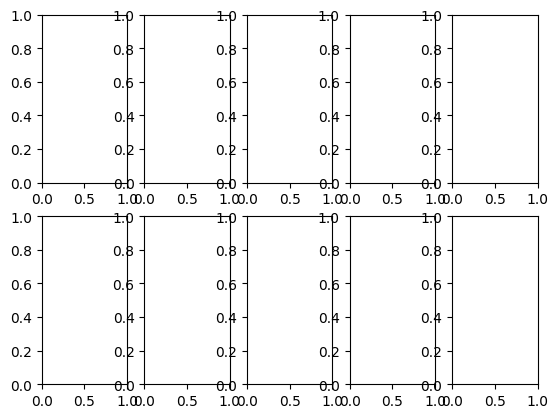

In [5]:
import pandas as pd
import numpy as  np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt




figure, list_of_axes = plt.subplots(nrows=  2, ncols = 5)

print(list_of_axes.ndim)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import prince
Dane = pd.read_csv("CO2Emission.csv", sep = ';', decimal = ',')




FAMD = prince.FAMD(n_components =0.5)

X = Dane.iloc[:, :-1].drop(columns = ["Model"])
y = Dane.iloc[:, -1]




cat_vars = X.select_dtypes(include=  "object").columns.to_list()
numerical_vars = X.select_dtypes(include=  ["int", "float"]).columns.to_list()

Scaler = ColumnTransformer(transformers =[("Scaler", StandardScaler(), numerical_vars)], remainder=  "passthrough")
Scaler.set_output(transform = "pandas")


suma = 0

for n_comp in range(1, X.shape[1]):
    Transformer = Pipeline(steps = [("Scaler", Scaler),("FAMD",       prince.FAMD(n_components=n_comp))])
    
    Transformer.fit(X = X)

    suma +=Transformer["FAMD"].percentage_of_variance_[-1]


    print(f"{suma/n_comp}, {suma}")


    



c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.21770017209205406, -0.31654875520387676, -0.016456586163758256, -0.992456312810207, -0.9312159623765958, -0.1396387640588901, -0.09013643461417804, -0.11282067064046547, -0.27830612507677066, -0.11161399775834206, -0.37778530045921616, -0.0285036433547643, -0.16701610850757953, -0.20685608052484597, -0.3990510069667002, -0.15437646219076787, -0.25811146841750204, -0.14060513381829123, -0.41240086722477376, -0.08228293081879129, -0.2980414515435488, -0.2407391011600582, -0.23847859005514926, -0.17102186012858583, -0.20816117915315516, -0.2607213575245901, -0.25011845534898286, -0.10537356573056256, -0.15172222775204028, -0.2195582442392122, -0.1612409560374137, -0.12853004675202287, -0.2207882720384757, -0.336857917527878, -0.2350470645332563, -0.16039896095578043, -0.2648436899282041, -0.3191050450715487, -0.16207857

4.660211093778327, 4.660211093778327


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.21770017209205406, -0.31654875520387676, -0.016456586163758256, -0.992456312810207, -0.9312159623765958, -0.1396387640588901, -0.09013643461417804, -0.11282067064046547, -0.27830612507677066, -0.11161399775834206, -0.37778530045921616, -0.0285036433547643, -0.16701610850757953, -0.20685608052484597, -0.3990510069667002, -0.15437646219076787, -0.25811146841750204, -0.14060513381829123, -0.41240086722477376, -0.08228293081879129, -0.2980414515435488, -0.2407391011600582, -0.23847859005514926, -0.17102186012858583, -0.20816117915315516, -0.2607213575245901, -0.25011845534898286, -0.10537356573056256, -0.15172222775204028, -0.2195582442392122, -0.1612409560374137, -0.12853004675202287, -0.2207882720384757, -0.336857917527878, -0.2350470645332563, -0.16039896095578043, -0.2648436899282041, -0.3191050450715487, -0.16207857

3.940617722493306, 7.881235444986612


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.21770017209205406, -0.31654875520387676, -0.016456586163758256, -0.992456312810207, -0.9312159623765958, -0.1396387640588901, -0.09013643461417804, -0.11282067064046547, -0.27830612507677066, -0.11161399775834206, -0.37778530045921616, -0.0285036433547643, -0.16701610850757953, -0.20685608052484597, -0.3990510069667002, -0.15437646219076787, -0.25811146841750204, -0.14060513381829123, -0.41240086722477376, -0.08228293081879129, -0.2980414515435488, -0.2407391011600582, -0.23847859005514926, -0.17102186012858583, -0.20816117915315516, -0.2607213575245901, -0.25011845534898286, -0.10537356573056256, -0.15172222775204028, -0.2195582442392122, -0.1612409560374137, -0.12853004675202287, -0.2207882720384757, -0.336857917527878, -0.2350470645332563, -0.16039896095578043, -0.2648436899282041, -0.3191050450715487, -0.16207857

3.3812627040098224, 10.143788112029467


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.21770017209205406, -0.31654875520387676, -0.016456586163758256, -0.992456312810207, -0.9312159623765958, -0.1396387640588901, -0.09013643461417804, -0.11282067064046547, -0.27830612507677066, -0.11161399775834206, -0.37778530045921616, -0.0285036433547643, -0.16701610850757953, -0.20685608052484597, -0.3990510069667002, -0.15437646219076787, -0.25811146841750204, -0.14060513381829123, -0.41240086722477376, -0.08228293081879129, -0.2980414515435488, -0.2407391011600582, -0.23847859005514926, -0.17102186012858583, -0.20816117915315516, -0.2607213575245901, -0.25011845534898286, -0.10537356573056256, -0.15172222775204028, -0.2195582442392122, -0.1612409560374137, -0.12853004675202287, -0.2207882720384757, -0.336857917527878, -0.2350470645332563, -0.16039896095578043, -0.2648436899282041, -0.3191050450715487, -0.16207857

3.0342444289768187, 12.136977715907275


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.21770017209205406, -0.31654875520387676, -0.016456586163758256, -0.992456312810207, -0.9312159623765958, -0.1396387640588901, -0.09013643461417804, -0.11282067064046547, -0.27830612507677066, -0.11161399775834206, -0.37778530045921616, -0.0285036433547643, -0.16701610850757953, -0.20685608052484597, -0.3990510069667002, -0.15437646219076787, -0.25811146841750204, -0.14060513381829123, -0.41240086722477376, -0.08228293081879129, -0.2980414515435488, -0.2407391011600582, -0.23847859005514926, -0.17102186012858583, -0.20816117915315516, -0.2607213575245901, -0.25011845534898286, -0.10537356573056256, -0.15172222775204028, -0.2195582442392122, -0.1612409560374137, -0.12853004675202287, -0.2207882720384757, -0.336857917527878, -0.2350470645332563, -0.16039896095578043, -0.2648436899282041, -0.3191050450715487, -0.16207857

2.817133582152201, 14.085667910761005


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.21770017209205406, -0.31654875520387676, -0.016456586163758256, -0.992456312810207, -0.9312159623765958, -0.1396387640588901, -0.09013643461417804, -0.11282067064046547, -0.27830612507677066, -0.11161399775834206, -0.37778530045921616, -0.0285036433547643, -0.16701610850757953, -0.20685608052484597, -0.3990510069667002, -0.15437646219076787, -0.25811146841750204, -0.14060513381829123, -0.41240086722477376, -0.08228293081879129, -0.2980414515435488, -0.2407391011600582, -0.23847859005514926, -0.17102186012858583, -0.20816117915315516, -0.2607213575245901, -0.25011845534898286, -0.10537356573056256, -0.15172222775204028, -0.2195582442392122, -0.1612409560374137, -0.12853004675202287, -0.2207882720384757, -0.336857917527878, -0.2350470645332563, -0.16039896095578043, -0.2648436899282041, -0.3191050450715487, -0.16207857

2.6601793617064593, 15.961076170238755


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.21770017209205406, -0.31654875520387676, -0.016456586163758256, -0.992456312810207, -0.9312159623765958, -0.1396387640588901, -0.09013643461417804, -0.11282067064046547, -0.27830612507677066, -0.11161399775834206, -0.37778530045921616, -0.0285036433547643, -0.16701610850757953, -0.20685608052484597, -0.3990510069667002, -0.15437646219076787, -0.25811146841750204, -0.14060513381829123, -0.41240086722477376, -0.08228293081879129, -0.2980414515435488, -0.2407391011600582, -0.23847859005514926, -0.17102186012858583, -0.20816117915315516, -0.2607213575245901, -0.25011845534898286, -0.10537356573056256, -0.15172222775204028, -0.2195582442392122, -0.1612409560374137, -0.12853004675202287, -0.2207882720384757, -0.336857917527878, -0.2350470645332563, -0.16039896095578043, -0.2648436899282041, -0.3191050450715487, -0.16207857

2.5417951539332777, 17.792566077532943


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.21770017209205406, -0.31654875520387676, -0.016456586163758256, -0.992456312810207, -0.9312159623765958, -0.1396387640588901, -0.09013643461417804, -0.11282067064046547, -0.27830612507677066, -0.11161399775834206, -0.37778530045921616, -0.0285036433547643, -0.16701610850757953, -0.20685608052484597, -0.3990510069667002, -0.15437646219076787, -0.25811146841750204, -0.14060513381829123, -0.41240086722477376, -0.08228293081879129, -0.2980414515435488, -0.2407391011600582, -0.23847859005514926, -0.17102186012858583, -0.20816117915315516, -0.2607213575245901, -0.25011845534898286, -0.10537356573056256, -0.15172222775204028, -0.2195582442392122, -0.1612409560374137, -0.12853004675202287, -0.2207882720384757, -0.336857917527878, -0.2350470645332563, -0.16039896095578043, -0.2648436899282041, -0.3191050450715487, -0.16207857

2.446211356902139, 19.56969085521711


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.21770017209205406, -0.31654875520387676, -0.016456586163758256, -0.992456312810207, -0.9312159623765958, -0.1396387640588901, -0.09013643461417804, -0.11282067064046547, -0.27830612507677066, -0.11161399775834206, -0.37778530045921616, -0.0285036433547643, -0.16701610850757953, -0.20685608052484597, -0.3990510069667002, -0.15437646219076787, -0.25811146841750204, -0.14060513381829123, -0.41240086722477376, -0.08228293081879129, -0.2980414515435488, -0.2407391011600582, -0.23847859005514926, -0.17102186012858583, -0.20816117915315516, -0.2607213575245901, -0.25011845534898286, -0.10537356573056256, -0.15172222775204028, -0.2195582442392122, -0.1612409560374137, -0.12853004675202287, -0.2207882720384757, -0.336857917527878, -0.2350470645332563, -0.16039896095578043, -0.2648436899282041, -0.3191050450715487, -0.16207857

2.358882362392514, 21.229941261532627


In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import f1_score


a1  =[1,2,3]
a2=['a','b','c']
a3 = [4,5,6]



DataFrame = pd.DataFrame(data = np.random.uniform(0, 3, size = [500, 27]), columns = pd.MultiIndex.from_product([a1, a2, a3]))

slicer = pd.IndexSlice


print(DataFrame.loc[:, slicer[1, "a",:]].melt(var_name = "elo", value_name = "wartosc"))

      elo   wartosc
0       1  1.129303
1       1  1.267461
2       1  2.713675
3       1  2.247601
4       1  0.783124
...   ...       ...
1495    1  1.674993
1496    1  2.802600
1497    1  2.089014
1498    1  1.268452
1499    1  1.443332

[1500 rows x 2 columns]


In [ ]:
import numpy as np


np.random.seed(42)
x = np.random.uniform(0, 5, size  =[ 500, 4])

print(np.median(x, axis=  0))

[2.57753136 2.47580859 2.34942962 2.69112196]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from string import ascii_lowercase
dane = pd.read_csv("CO2Emission.csv", sep = ';', decimal = ',')




y = dane['CO2 Emissions(g/km)']



progi:tuple[int] = (-float("inf"), 100, 120, 150, 170, float("inf")) #Progi klas emisyjności dwutlenku węgla.


def Dyskretyzuj(y:pd.Series, progi:tuple[int]) -> pd.Series:
    b1:float = y.min()
    b6:float = y.max()

    prev_bi:float = b1

    nowe_progi = np.zeros(shape = len(progi), dtype = np.float32)

    nowe_progi[0] = -float('inf')
    nowe_progi[-1] = float('inf')
    nowe_progi[1] = b1
    nowe_progi[-2] = b6


    for  i in range(2, len(progi)-2):
        bi:float = (progi[i]-progi[i-1])/(progi[-2]-progi[1]) * (b6-b1) + prev_bi
        prev_bi:float = bi
        
        nowe_progi[i] = bi


    y_dyscretized:pd.Series = pd.cut(x = y, bins = nowe_progi, labels = [ascii_lowercase[i] for i in range(len(nowe_progi)-1)])
    return y_dyscretized

print(Dyskretyzuj(y = y, progi  = progi).value_counts())
print(pd.cut(MinMaxScaler(feature_range = (progi[1], progi[-2])).fit_transform(X = pd.DataFrame(y))[:, 0], bins = progi, labels = ['A','B','C','D','E']).value_counts())

CO2 Emissions(g/km)
c    4981
b    2302
d      98
a       4
e       0
Name: count, dtype: int64
A       4
B    2302
C    4981
D      98
E       0
Name: count, dtype: int64


Text(0.5, 1.0, 'An example of logistic regression')

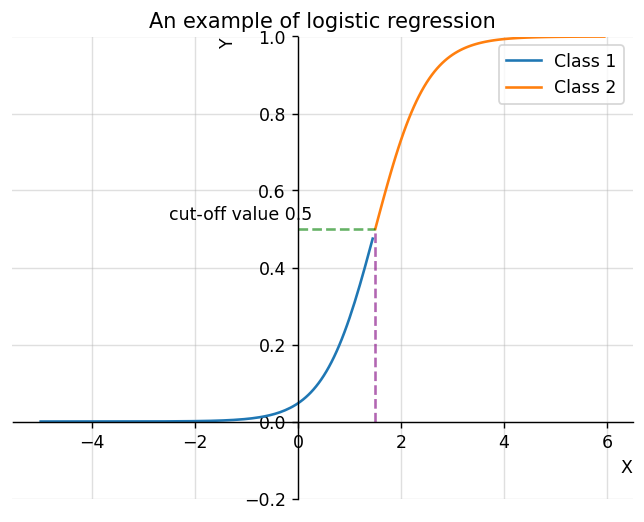

In [77]:
import numpy as np


import matplotlib.pyplot as plt

a:float = 3
b:float = 2




cutoff_value:float = 0.5
cutoff_arg:float = (a - np.log((1-cutoff_value)/cutoff_value))/b

figure = plt.figure( dpi = 125)
axes = figure.add_subplot()


x1 = np.arange(-5, cutoff_arg, 0.05)
x2 = np.arange(cutoff_arg, 6, 0.05)

y1 = 1/(1+np.exp(a-b*x1))
y2 = 1/(1+np.exp(a-b*x2))


axes.plot(x1, y1)
axes.plot(x2, y2)


axes.grid(True, alpha = 0.4)

axes.set_ylim(-0.2, 1)

axes.spines['bottom'].set_position(("data",0))
axes.spines['left'].set_position(("data",0))
axes.spines[['top','right']].set_visible(False)


axes.vlines(x = cutoff_arg, ymin = 0 ,ymax = cutoff_value, linestyle = "dashed", color = "purple", alpha = 0.6)
axes.hlines(y = cutoff_value, xmin = 0 ,xmax = cutoff_arg, linestyle = "dashed", color = "green", alpha = 0.6)

axes.annotate(text = f"cut-off value {cutoff_value}", xy = (-2.5, cutoff_value+0.025), wrap = True)

axes.legend(['Class 1','Class 2'])

axes.set_xlabel("X", loc = "right")
axes.set_ylabel("Y", loc = "top")
axes.set_title("An example of logistic regression", pad = 5)




C:\Users\pawel\AppData\Local\Temp\ipykernel_14492\2642150306.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df, x = "Fuel Consumption City (L/100 km)", hue = "Fuel Type")


<Axes: xlabel='Fuel Consumption City (L/100 km)', ylabel='Density'>

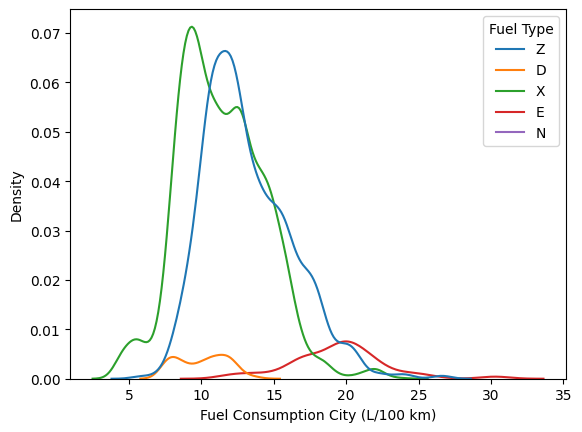

In [17]:
import polars as pl
import numpy as np
import seaborn as sns

#The datatype of each feature of the dataframe.
dtypes = { "Make": pl.String,
            "Model":pl.String,
            "Vehicle Class":pl.String,
            "Engine Size(L)":pl.Float64,
            "Cylinders":pl.UInt8,
            "Transmission":pl.String,
            "Fuel Type":pl.String,
            "Fuel Consumption City (L/100 km)":pl.Float64,
            "Fuel Consumption Hwy (L/100 km)":pl.Float64,
            "Fuel Consumption Comb (L/100 km)":pl.Float64,
            "Fuel Consumption Comb (mpg)":pl.Float64,
            "CO2 Emissions(g/km)":pl.Float64}


df = pl.read_csv(source = "CO2Emission.csv", separator = ';',  decimal_comma = True,
                 schema = dtypes)



sns.kdeplot(data = df, x = "Fuel Consumption City (L/100 km)", hue = "Fuel Type")



In [13]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import StratifiedShuffleSplit as SSS
from prince import FAMD

import pandas as pd

#The datatype of each feature of the dataframe.
dtypes = { "Make": pd.CategoricalDtype(),
            "Model":pd.CategoricalDtype(),
            "Vehicle Class":pd.CategoricalDtype(),
            "Engine Size(L)":np.float64,
            "Cylinders":np.int8,
            "Transmission":pd.CategoricalDtype(),
            "Fuel Type": pd.CategoricalDtype(),
            "Fuel Consumption City (L/100 km)":np.float64,
            "Fuel Consumption Hwy (L/100 km)":np.float64,
            "Fuel Consumption Comb (L/100 km)":np.float64,
            "Fuel Consumption Comb (mpg)":np.float64,
            "CO2 Emissions(g/km)":np.float64}


Dane:pd.DataFrame = pd.read_csv("CO2Emission.csv", dtype = dtypes, sep = ';', decimal = ',') 
Dane.drop(columns = ["Model"], inplace = True)

X:pd.DataFrame = Dane.iloc[:, 1:]
y:pd.Series  = Dane.iloc[:, 0]

FAMD_inst = FAMD(n_components = 4)

SSS_inst = SSS(n_splits = 1, train_size = 0.8, test_size = 0.2, random_state = 42)


for train_idx, test_idx in SSS_inst.split(X = X, y = y):
    X_train :pd.DataFrame= X.iloc[train_idx, :] #Find the training subset of X dataframe.
    X_test:pd.DataFrame = X.iloc[test_idx, :] #Find the testing subset of X dataframe.

    
    FAMD_inst.fit_transform(X = X_train)
    print(FAMD_inst.transform(X = X_train))

c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:178: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.16249576839446306, -0.9314703979377222, -0.08629906589612076, -0.8128953910086386, -0.6198586774091148, -0.10728381610019747, -0.20322384775215965, -0.026020147394144395, -0.21535503900139058, -0.31061125226535563, -0.018399022669872974, -0.994568866832957, -0.08823861291832216, -0.13139530355203521, -0.15283376076393748, -0.46217817583189846, -0.11923929502757463, -0.3642820635180215, -0.30400174606632513, -0.03679804533974595, -0.18214103175901075, -0.34568625143024473, -0.03186804207383157, -0.21058643976299007, -0.08228293081879129, -0.5990287783728673, -0.29838200558899225, -0.57656795139236, -0.1425182167738215, -0.27598534004809466, -0.058182818357870876, -0.1802728692283561, -0.09908176936746986, -0.23053909327361477, -0.49301141698571926, -0.5262249146504913, -0.41387578065705755, -0.5504352927545774, -0.297

component         0         1         2         3
1208       4.726865 -3.348151 -0.813477 -2.807780
6192      -2.608375 -2.131163  1.250274  1.416966
6245      -2.281794 -1.059018  0.340848 -0.765023
886        1.134772 -4.006761 -0.339341  5.012392
7023      -2.445700  1.494111 -0.494213  0.961972
...             ...       ...       ...       ...
7181       1.180247 -0.892824  0.257499 -0.932690
5440      -2.123104 -0.115034  0.396718 -1.305305
6610       2.988265 -2.118508  0.257936 -2.347735
4447      -1.361114 -1.570174 -0.545636 -1.927947
3181       5.078255 -3.376968  0.259910 -2.527128

[5908 rows x 4 columns]


c:\Users\pawel\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:178: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.16249576839446306, -0.9314703979377222, -0.08629906589612076, -0.8128953910086386, -0.6198586774091148, -0.10728381610019747, -0.20322384775215965, -0.026020147394144395, -0.21535503900139058, -0.31061125226535563, -0.018399022669872974, -0.994568866832957, -0.08823861291832216, -0.13139530355203521, -0.15283376076393748, -0.46217817583189846, -0.11923929502757463, -0.3642820635180215, -0.30400174606632513, -0.03679804533974595, -0.18214103175901075, -0.34568625143024473, -0.03186804207383157, -0.21058643976299007, -0.08228293081879129, -0.5990287783728673, -0.29838200558899225, -0.57656795139236, -0.1425182167738215, -0.27598534004809466, -0.058182818357870876, -0.1802728692283561, -0.09908176936746986, -0.23053909327361477, -0.49301141698571926, -0.5262249146504913, -0.41387578065705755, -0.5504352927545774, -0.297

Text(0.5, 1.0, 'ELo elo trzy dwa $\\bf{Kurwa}$')

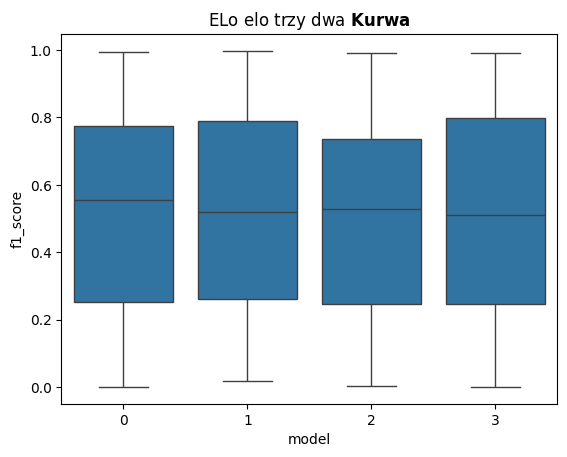

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import numpy as np
np.random.seed(1)






X:np.ndarray = np.random.uniform(0, 1, size = 500) #Create a list of artificially-sythensized metric value
y:np.ndarray = np.random.randint(0, 4, size = 500) #Create a list of models's identification numbers.

Data = pl.DataFrame(data = np.column_stack(tup = (X,y)), #Define the polars.Dataset with two columns: f1_score and model of float64 and int16 datatype respectively.
                                           schema = [("f1_score", pl.Float64), ("model", pl.Int16)])


Data

axes = sns.boxplot(data =Data, x = "model", y = "f1_score")
zero = "Kurwa"

text = fr"ELo elo trzy dwa $\bf{{{zero}}}$"
axes.set_title(text)



In [12]:
import numpy as np
from sklearn.model_selection import train_test_split


train_size = 0.8
test_size = 1-train_size

n  = 15

for i in range(n):
    N = np.random.randint(0, 50000)
    X = np.random.uniform(0, 10, size = [N, 4])
    X_train, X_test = train_test_split(X, test_size = test_size, train_size = train_size)

    train_size_n:int = X_train.shape[0]

    print(train_size_n== np.floor(N*train_size))


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [51]:
import pandas as pd, numpy as np
#The datatype of each feature of the dataframe.

dtypes = {
    "Make": pd.CategoricalDtype(),  # typ dla ciągów znaków
    "Model": pd.CategoricalDtype(),  # typ dla ciągów znaków
    "Vehicle Class": pd.CategoricalDtype(),  # typ dla ciągów znaków
    "Engine Size(L)": pd.Float64Dtype(),  # zmiennoprzecinkowy, natywny typ pandas
    "Cylinders":  pd.Int8Dtype(),  # liczba całkowita o małej precyzji
    "Transmission": pd.CategoricalDtype(),  # typ dla ciągów znaków
    "Fuel Type": pd.CategoricalDtype(),  # typ dla ciągów znaków
    "Fuel Consumption City (L/100 km)": pd.Float64Dtype(),  # zmiennoprzecinkowy
    "Fuel Consumption Hwy (L/100 km)": pd.Float64Dtype(),  # zmiennoprzecinkowy
    "Fuel Consumption Comb (L/100 km)": pd.Float64Dtype(),  # zmiennoprzecinkowy
    "Fuel Consumption Comb (mpg)": pd.Float64Dtype(),  # zmiennoprzecinkowy
    "CO2 Emissions(g/km)": pd.Float64Dtype()  # zmiennoprzecinkowy
}



features:list[str] = list(dtypes.keys())
print(features)


cat_features:list[str] = [feature for feature in features if isinstance(dtypes[feature], pd.CategoricalDtype)]
num_features:list[str] = [feature for feature in features if pd.api.types.is_numeric_dtype(dtypes[feature])]

print(cat_features)
print(num_features)

['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


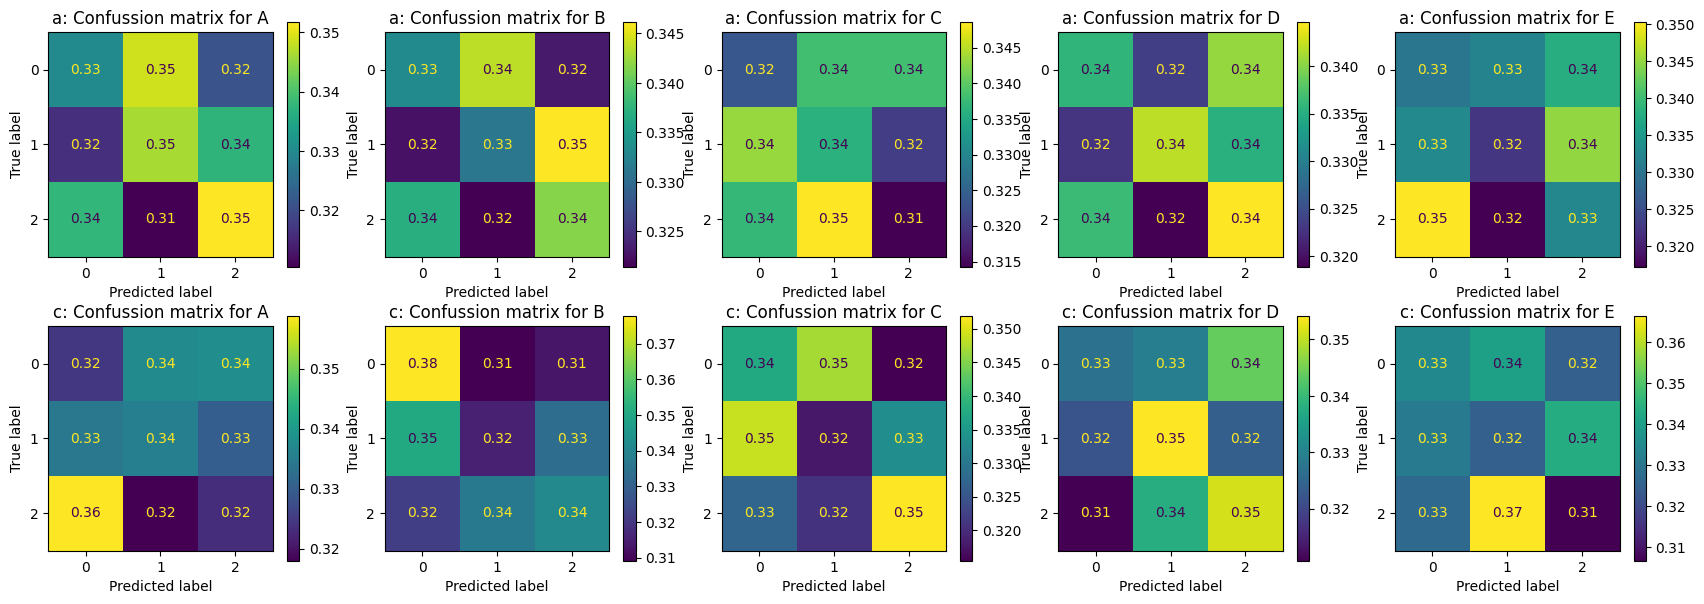

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.cm as cm
import matplotlib.colors as mplcolors




Normalizator = mplcolors.Normalize(vmin = 0, vmax = 10) 
ScallarMapper = cm.ScalarMappable(norm = Normalizator, cmap = "magma")


modele = ['A','B','C','D','E']
treningi =['a','b','c','d']


figure, axes_array =  plt.subplots(nrows = 2, ncols  = len(modele), figsize  = (21, 7))


np.random.seed(1)

for row_idx, train_type in enumerate(['a','c']):
    for col_idx, model in enumerate(modele):
        y_true = np.random.randint(0, 3, size = 5000)
        y_pred = np.random.randint(0,3, size = 5000)

        conf_matrix = confusion_matrix(y_true = y_true, y_pred = y_pred, normalize = "true")

        axes = axes_array[row_idx, col_idx]


        conf_matrix_displayer = ConfusionMatrixDisplay(confusion_matrix= conf_matrix)   
    
        conf_matrix_displayer.plot(ax = axes)
        axes.set_title(f"{train_type}: Confussion matrix for {model}")



In [1]:
napis = "Elo elo \" trzy dwa zero \""
print(napis)

Elo elo " trzy dwa zero "
